# House Market

Let's go a little further into python.

1. Download the four files <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+visualisation+et+collaboration/house_price/square_feet.csv" target="_blank">```square_feet.csv```</a> / <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+visualisation+et+collaboration/house_price/number_of_bathrooms.csv" target="_blank">```number_of_bathrooms.csv```</a> / <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+visualisation+et+collaboration/house_price/number_of_rooms.csv" target="_blank">```number_of_rooms.csv```</a> / <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+visualisation+et+collaboration/house_price/house_price.csv" target="_blank">```house_price.csv```</a>

2. Read the files and create the 4 corresponding DataFrames


In [3]:
import pandas as pd

square_feet_df = pd.read_csv('superficie.csv')
number_of_bathrooms_df = pd.read_csv('nombre_de_sdb.csv')
number_of_rooms_df = pd.read_csv('nombre_de_chambres.csv')
house_price_df = pd.read_csv('house_price.csv')

3. Give a column name to the three datasets that don't have a header in the source file

In [1]:
square_feet_df = pd.read_csv('superficie.csv', names=['Square Feet'])
number_of_bathrooms_df = pd.read_csv('nombre_de_sdb.csv', names=['Number of Bathrooms'])
number_of_rooms_df = pd.read_csv('nombre_de_chambres.csv', names=['Number of Rooms'])


NameError: name 'pd' is not defined

,id,surface
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713


,id,bathrooms
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


,id,rooms
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2


,id,house_price
0,14,1918154.0
1,30,739142.0
2,70,1621938.0
3,77,1319862.0
4,50,146250.0


4. Make an inner join of these four datasets into a single dataframe. 

,id,surface,bathrooms,rooms,house_price
0,0,28844,2,1,1421908.0
1,1,27667,1,4,1305091.0
2,2,14742,1,1,164373.0
3,3,28089,3,4,1441714.0
4,4,11713,1,2,108290.0


5. What is the average surface area of the houses in our dataset?

The average surface area in this dataset is 20439.77 square feets


6. What is the median and average number of rooms?

The average number of room is 2.42, and the median number is 2.0


7. What is the average cost of a house?

The average cost of a house is 767747.87$


8. What is the average cost of a house, depending on the number of rooms it has?

rooms
1    980774.869565
2    642086.258065
3    645904.592593
4    888045.631579
Name: house_price, dtype: float64

10. The average cost per room doesn't tell us much. Let's try to categorize by size.

  - Create a new column in your dataset that we'll call home_size
Create three categories that respectively correspond to :

      - "very large" == "a house larger than 25,000 sqrt_feet"
      
      - "large" == "a house between 20,000 and 25,000 sqrt_feet"
      
      - "medium" == "a house between 15,000 and 20,000 sqrt_feet"
    
      - "small" == "a house between 10,000 and 15,000 sqrt_feet" 
    
      - "very small" == a house less than 10,000 sqrt_feet"
      
Fill in the corresponding rows in the house_size column.

**Tip:**

You can use the <a href ="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html" target="_blank">```apply(lambda)```</a> function

,id,surface,bathrooms,rooms,house_price,house_size
0,0,28844,2,1,1421908.0,very large
1,1,27667,1,4,1305091.0,very large
2,2,14742,1,1,164373.0,small
3,3,28089,3,4,1441714.0,very large
4,4,11713,1,2,108290.0,small
...,...,...,...,...,...,...
95,95,11417,3,3,132599.0,small
96,96,12126,1,2,155828.0,small
97,97,16390,1,2,237061.0,medium
98,98,23738,1,2,976422.0,large


11. What is the average cost of a house depending on its size category?


house_size
large         7.325385e+05
medium        3.256948e+05
small         1.561387e+05
very large    1.552456e+06
Name: house_price, dtype: float64

 12. Apply the code below to view your result. What can you conclude?

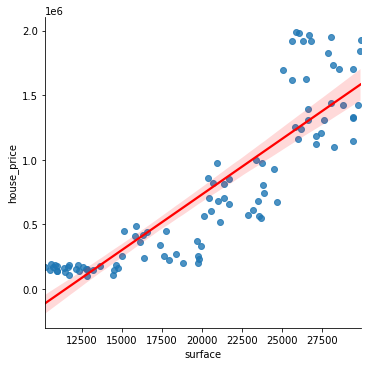